In [1]:
import pandas as pd
df = pd.read_json('./data/dataSet_Culture_06102023-POINT.json')

# Extract year, month, and day from 'Analysis Date'
df['year'] = df['Analysis Date'].str.split('-').str[0].astype(int)
df['month'] = df['Analysis Date'].str.split('-').str[1].astype(int)
df['day'] = df['Analysis Date'].str.split('-').str[2].astype(int)

# Extract x and y from 'polygon'
df['polygon_x'] = df['polygon'].apply(lambda x: x['x'])
df['polygon_y'] = df['polygon'].apply(lambda x: x['y'])

# Create a 'vegetation' column based on 'indextype'
df['vegetation'] = (df['indextype'] == 'NDVI')

# Drop unnecessary columns
df = df.drop(['polygon', 'soil_id'], axis=1)
# 
# Combine 'polygon_x', 'polygon_y', and 'year' into 'combined' column
df['combined'] = df[['polygon_x', 'polygon_y', 'year']].astype(str).agg('_'.join, axis=1)

# Assign unique ID based on the 'combined' column
df['id'] = df['combined'].astype('category').cat.codes + 1

# Drop unnecessary columns
df = df.drop(columns=['combined', 'polygon_x', 'polygon_y', 'year', 'indextype', 'year contour', 'month', 'day', 'vegetation', 'type_culture_name'])

# Rename columns
df = df.rename(columns={'culture_name': 'class', 'averagevalue': 'red', 'Analysis Date': 'date'})

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract 'year', 'month', and 'day' from 'date' and drop 'date'
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df = df.drop('date', axis=1)

# Pivot table
pivot_df = df.pivot_table(index='id', columns='month', values='red', aggfunc='mean')

# Fill NaN values with zeros
# pivot_df = pivot_df.fillna(0)

# Rename columns
pivot_df.columns = [f'ndvi_{col}_month' for col in pivot_df.columns]

# Reset the index
pivot_df = pivot_df.reset_index()

# Extract unique values for 'id', 'class', 'elevation_contour', 'district_name', and 'soil_name'
unique_values = df.drop_duplicates(subset='id')[['id', 'class', 'elevation_contour', 'district_name', 'soil_name']]

# Merge unique values with the pivot dataframe
pivot_df = pd.merge(pivot_df, unique_values, on='id')

# Reordering columns
column_order = ['ndvi_4_month', 'ndvi_5_month', 'ndvi_6_month', 'ndvi_7_month', 'ndvi_8_month', 'id', 'elevation_contour', 'district_name', 'soil_name', 'class']
pivot_df = pivot_df[column_order]

In [2]:
nan_count = pivot_df.isna().sum()
# Display columns with NaN values and their respective counts
columns_with_nan = nan_count[nan_count > 0]
print("Columns with NaN values and their counts:")
print(columns_with_nan)

Columns with NaN values and their counts:
ndvi_4_month    110
ndvi_5_month    106
ndvi_6_month      2
ndvi_7_month    146
ndvi_8_month    201
dtype: int64


In [3]:
df = pivot_df

In [4]:
df['class'].value_counts()

class
Пшеница         231
Ячмень          193
Кукуруза        183
Свекла          163
Люцерна         121
Картофель        36
Соя              21
Лук               7
Арбуз             6
Рапс              5
Томат             5
Капуста           4
Лук-Морковка      4
Софлор            3
Экпарцет          3
Сил               2
Помидор           2
Клевер            2
Яровой            2
Морковь           1
Фасоль            1
Подсолнечник      1
Name: count, dtype: int64

In [5]:
df = df.dropna()


In [6]:
df['class'].value_counts()

class
Пшеница         140
Ячмень          116
Свекла           97
Кукуруза         92
Люцерна          74
Картофель        17
Соя              11
Лук               6
Арбуз             5
Томат             4
Капуста           3
Сил               2
Лук-Морковка      2
Помидор           2
Экпарцет          2
Клевер            2
Софлор            1
Рапс              1
Яровой            1
Name: count, dtype: int64

In [7]:
# Get the value counts of the 'class' column
class_counts = df['class'].value_counts()

# Find classes with counts less than 50
classes_to_combine = class_counts[class_counts < 70].index

# Combine those classes into a new class, for example, 'Other'
df['class'] = df['class'].replace(classes_to_combine, 'Другие')

# Now, check the updated value counts
print(df['class'].value_counts())


class
Пшеница     140
Ячмень      116
Свекла       97
Кукуруза     92
Люцерна      74
Другие       59
Name: count, dtype: int64


/tmp/ipykernel_107939/1830630956.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'] = df['class'].replace(classes_to_combine, 'Другие')


In [8]:
df

,ndvi_4_month,ndvi_5_month,ndvi_6_month,ndvi_7_month,ndvi_8_month,id,elevation_contour,district_name,soil_name,class
1,-0.00350,0.02875,0.08625,0.07825,0.11675,2,660,Panfilov district,Комплекс лугово-сероземных и сероземно-луговых...,Люцерна
4,-0.00775,0.15150,0.09875,0.00175,-0.01400,5,660,Panfilov district,Комплекс лугово-сероземных и сероземно-луговых...,Свекла
7,0.00000,0.00850,0.06100,-0.00975,-0.02525,8,707,Panfilov district,Сероземы северные (малокарбонатные) обыкновенные,Пшеница
9,-0.01475,0.03225,0.09875,-0.01225,-0.04200,10,709,Panfilov district,Сероземы северные (малокарбонатные) обыкновенные,Пшеница
11,0.00725,0.17225,0.17550,0.02325,-0.01950,12,656,Panfilov district,Комплекс сероземно-луговых и луговых (сазовых)...,Кукуруза
...,...,...,...,...,...,...,...,...,...,...
983,0.00075,0.00950,0.02400,0.02100,0.06050,984,1527,Kemin district,Горные светло-каштановые,Другие
986,-0.00075,0.01850,0.05600,0.04375,0.06400,987,1544,Kemin district,Горные светло-каштановые,Другие
989,-0.00675,0.01825,0.10925,0.04925,0.00550,990,1559,Kemin district,Горные светло-каштановые,Другие
992,-0.00525,0.01225,0.10700,0.07000,0.01825,993,1571,Kemin district,Горные светло-каштановые,Другие


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 578 entries, 1 to 994
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ndvi_4_month       578 non-null    float64
 1   ndvi_5_month       578 non-null    float64
 2   ndvi_6_month       578 non-null    float64
 3   ndvi_7_month       578 non-null    float64
 4   ndvi_8_month       578 non-null    float64
 5   id                 578 non-null    int16  
 6   elevation_contour  578 non-null    int64  
 7   district_name      578 non-null    object 
 8   soil_name          578 non-null    object 
 9   class              578 non-null    object 
dtypes: float64(5), int16(1), int64(1), object(3)
memory usage: 46.3+ KB


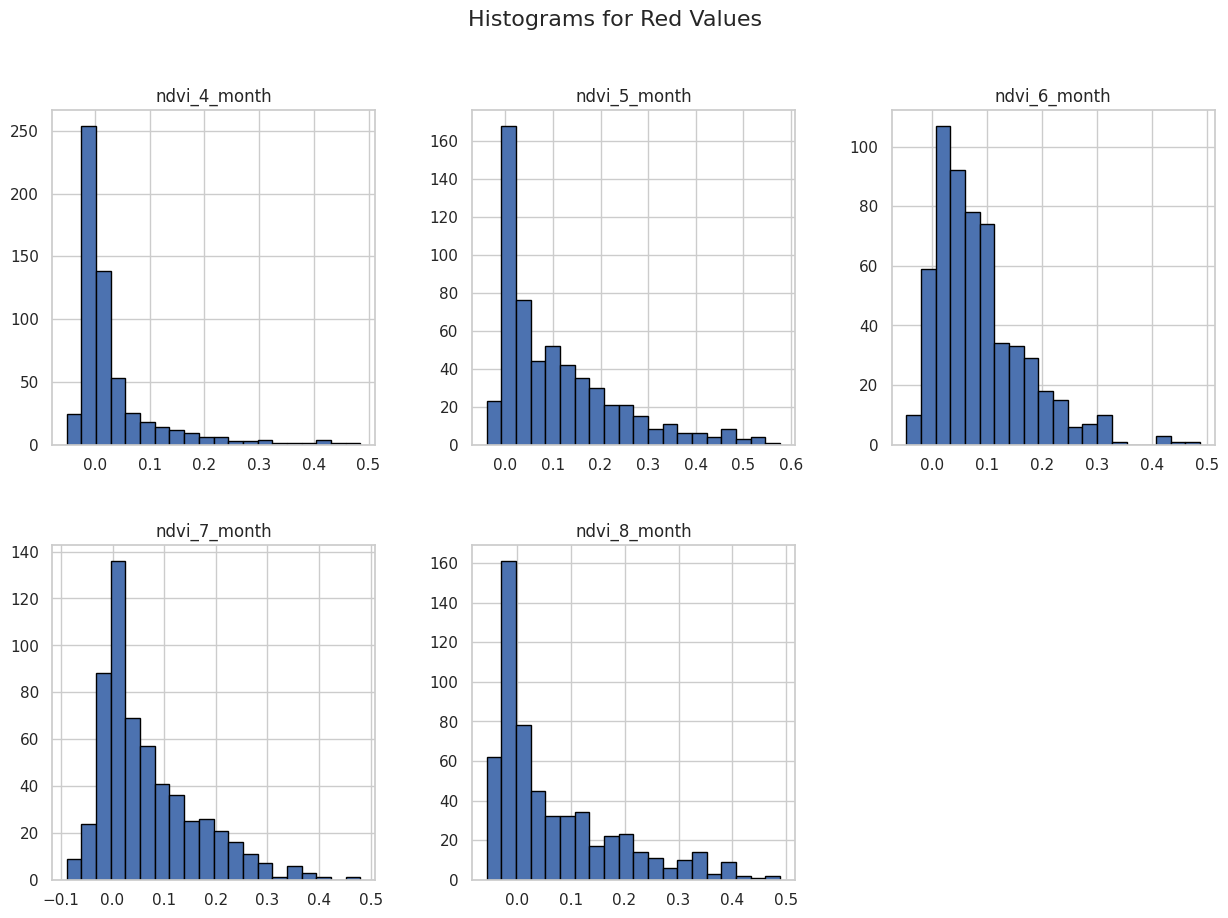

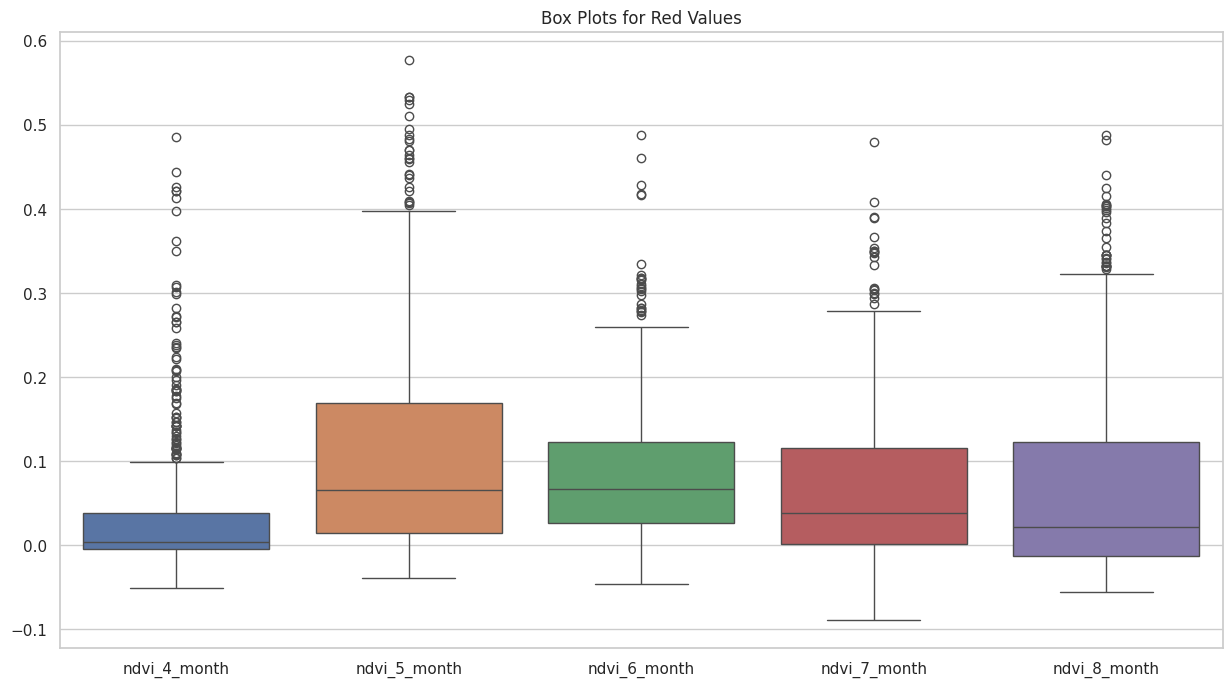

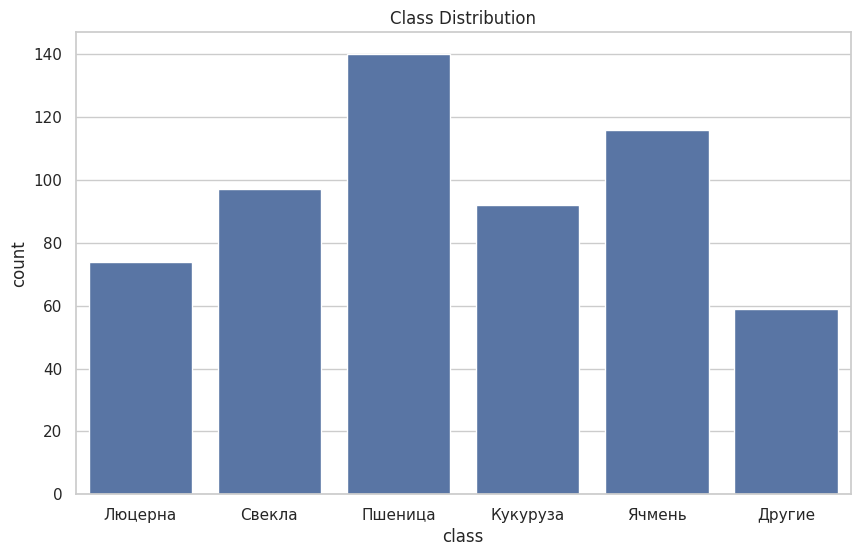

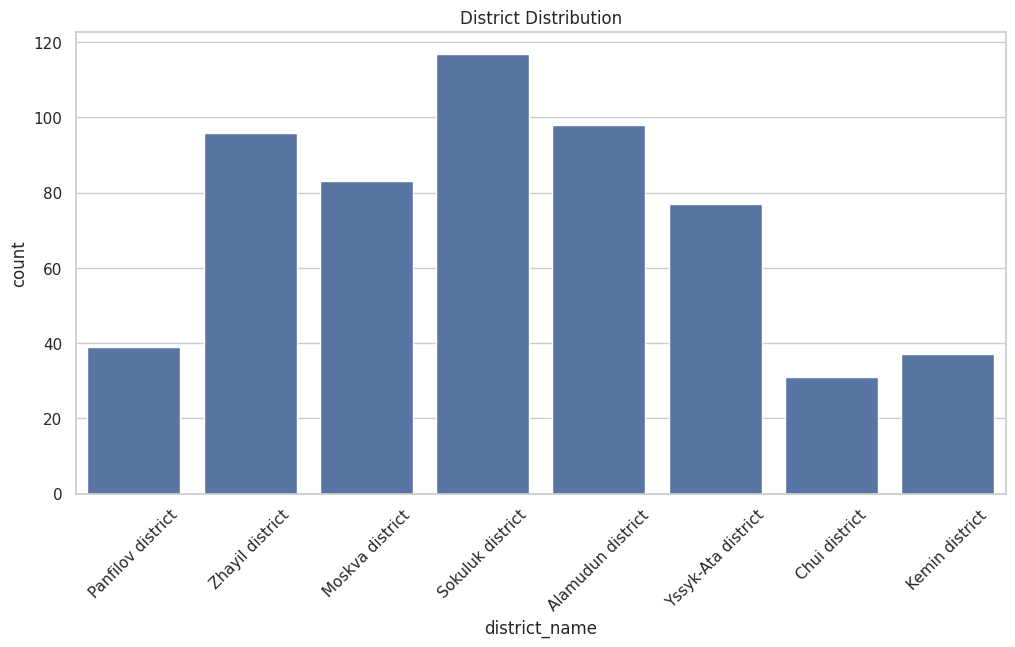

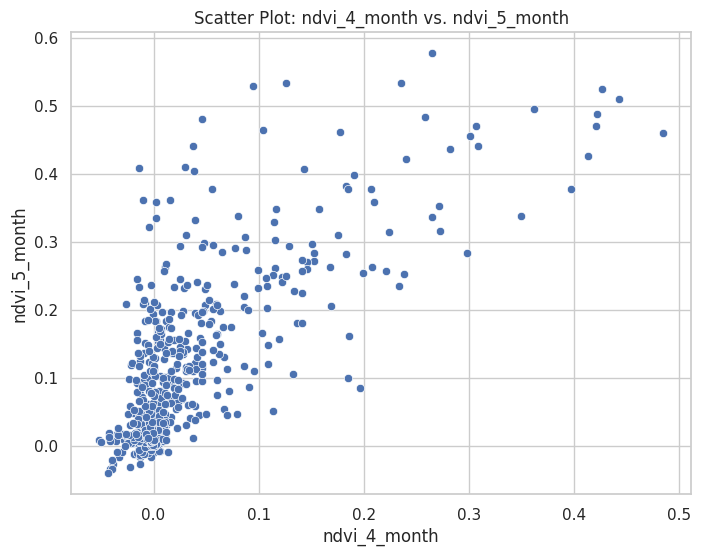

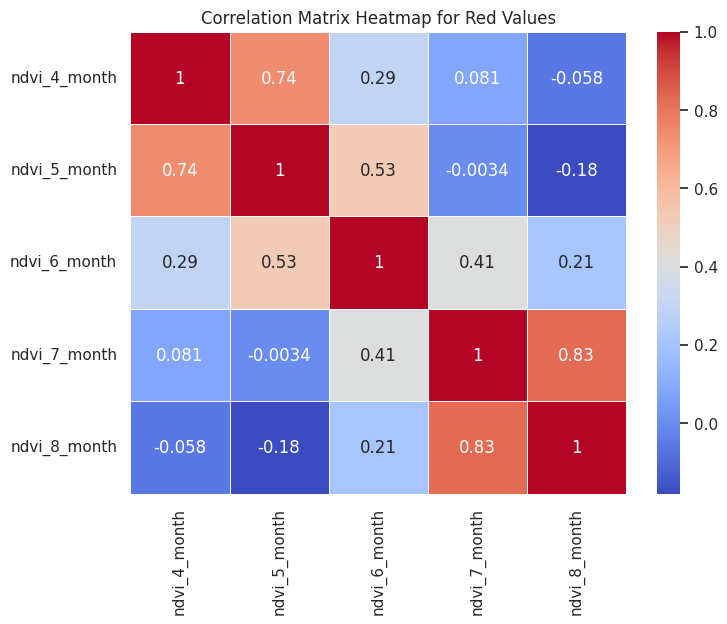

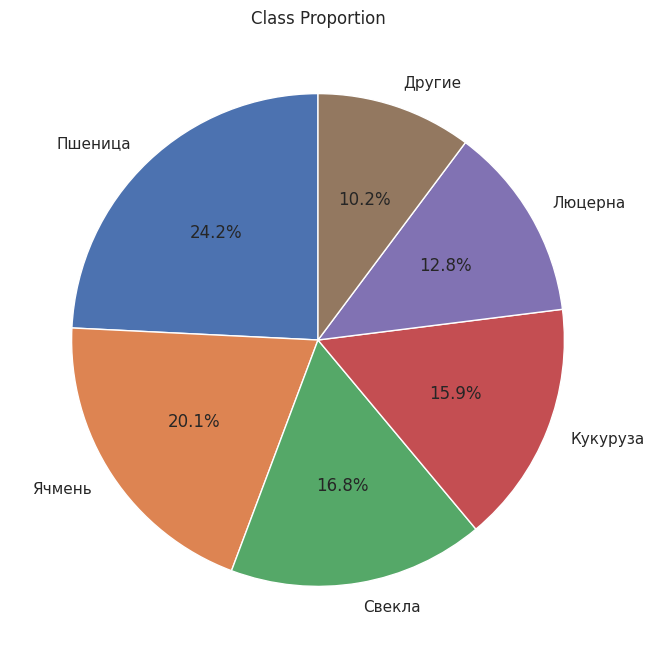

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your data is in a DataFrame called 'df'
# Replace 'your_data.csv' with your actual data file or provide the DataFrame

# Load your data
# df = pd.read_csv('your_data.csv')

# Set the style for seaborn
sns.set(style="whitegrid")

# Histograms for red values
ndvi_columns = ['ndvi_4_month', 'ndvi_5_month', 'ndvi_6_month', 'ndvi_7_month', 'ndvi_8_month']
df[ndvi_columns].hist(bins=20, figsize=(15, 10), layout=(2, 3), edgecolor='black')
plt.suptitle('Histograms for Red Values', fontsize=16)
plt.show()

# Box plots for red values
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[ndvi_columns])
plt.title('Box Plots for Red Values')
plt.show()

# Bar chart for class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()

# Bar chart for district distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='district_name', data=df)
plt.title('District Distribution')
plt.xticks(rotation=45)
plt.show()

# Scatter plot for ndvi_4_month vs. ndvi_5_month
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ndvi_4_month', y='ndvi_5_month', data=df)
plt.title('Scatter Plot: ndvi_4_month vs. ndvi_5_month')
plt.show()

# Correlation matrix heatmap
correlation_matrix = df[ndvi_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap for Red Values')
plt.show()

# Pie chart for class proportion
class_counts = df['class'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Proportion')
plt.show()


In [11]:
df = df.drop(columns='id')

In [12]:
len(df['soil_name'].unique())

13

In [13]:
len(df['class'].unique())

6

In [14]:
len(df['district_name'].unique())

8

In [25]:
df['class'].unique()

array(['Люцерна', 'Свекла', 'Пшеница', 'Кукуруза', 'Ячмень', 'Другие'],
      dtype=object)

In [38]:
df_encoded = pd.get_dummies(df, columns=['soil_name', 'district_name'], drop_first=True)

# Integer encode 'class'
class_mapping = {
    'Люцерна': 1,
    'Свекла': 2,
    'Пшеница': 3,
    'Кукуруза': 4,
    'Ячмень': 5,
    'Другие': 6
}  # Add more classes if needed
df_encoded['class'] = df_encoded['class'].map(class_mapping)

# Display the encoded DataFrame
df_encoded.head()

,ndvi_4_month,ndvi_5_month,ndvi_6_month,ndvi_7_month,ndvi_8_month,elevation_contour,class,soil_name_Аллювиальные луговые тугайных лесов и кустарников,soil_name_Горно-долинные каштановые и темно-каштановые,"soil_name_Горно-долинные светло-каштановые, местами в сочетании с лугово-светло-каштановыми слабозасоленными",...,soil_name_Сероземы северные (малокарбонатные) обыкновенные,soil_name_Сероземы северные (малокарбонатные) светлые вторично засоленные и заболоченные,"soil_name_Сероземы северные (малокарбонатные) светлые, местами слабо- и среднесолончаковатые",district_name_Chui district,district_name_Kemin district,district_name_Moskva district,district_name_Panfilov district,district_name_Sokuluk district,district_name_Yssyk-Ata district,district_name_Zhayil district
1,-0.00350,0.02875,0.08625,0.07825,0.11675,660,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,-0.00775,0.15150,0.09875,0.00175,-0.01400,660,2,False,False,False,...,False,False,False,False,False,False,True,False,False,False
7,0.00000,0.00850,0.06100,-0.00975,-0.02525,707,3,False,False,False,...,True,False,False,False,False,False,True,False,False,False
9,-0.01475,0.03225,0.09875,-0.01225,-0.04200,709,3,False,False,False,...,True,False,False,False,False,False,True,False,False,False
11,0.00725,0.17225,0.17550,0.02325,-0.01950,656,4,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [39]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 578 entries, 1 to 994
Data columns (total 26 columns):
 #   Column                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                 --------------  -----  
 0   ndvi_4_month                                                                                                                           578 non-null    float64
 1   ndvi_5_month                                                                                                                           578 non-null    float64
 2   ndvi_6_month                                                                                                                           578 non-null    float64
 3   ndvi_7_month                                                               

In [41]:
# Splitting the data
X = df_encoded.drop(['class'], axis=1)  # Features excluding 'id' and 'class'
y = df_encoded['class']  # Target variable

In [43]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [46]:
# Create DataFrames for train and test data
train_data = pd.concat([pd.DataFrame(X_train), pd.Series(y_train, name='target')], axis=1)
test_data = pd.concat([pd.DataFrame(X_test), pd.Series(y_test, name='target')], axis=1)

# Save train and test data to CSV files
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)